In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

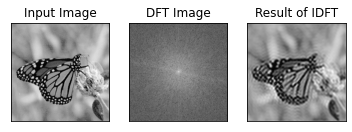

In [11]:
# 영상을 불러오기
img = cv2.imread('/content/gdrive/MyDrive/Image_Processing/butterfly.bmp',0)

# cv2.dft 함수를 이용하여 영상의 이산푸리에 변환 수행
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
# DFT
dft_shift = np.fft.fftshift(dft)
mag_dft=20*np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
mag_dft_shift=20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
# cv2.idft를 이용하여 이산푸리에 역변환을 수행함
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# 영상 및 이산푸리에 역변환한 결과를 출력함
plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(mag_dft_shift, cmap = 'gray')
plt.title('DFT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap = 'gray')
plt.title('Result of IDFT'), plt.xticks([]), plt.yticks([])
plt.show()